In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sms = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [3]:
sms.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sms=sms.iloc[:,[0,1]]

In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
sms.rename(columns={'v1': 'output', 'v2': 'msg'}, inplace=True)
label_map = {'ham': 0, 'spam': 1}
sms['output'] = sms['output'].map(lambda x: label_map[x])
sms.head()

,output,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
sms.shape

(5572, 2)

In [8]:
sms.describe()

,output
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
sms.duplicated().sum()

403


 **MISSING**

In [10]:
sms.isnull().sum()

output    0
msg       0
dtype: int64

In [11]:
sms.output.value_counts()

output
0    4825
1     747
Name: count, dtype: int64

**DUPLICATES**

In [12]:
sms.drop_duplicates(keep="first",inplace=True)
sms.shape

(5169, 2)

In [13]:
sms.output.value_counts()

output
0    4516
1     653
Name: count, dtype: int64

**COUNT PLOT**

<ipython-input-14-e6ca102f974a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=sms, palette=palette)


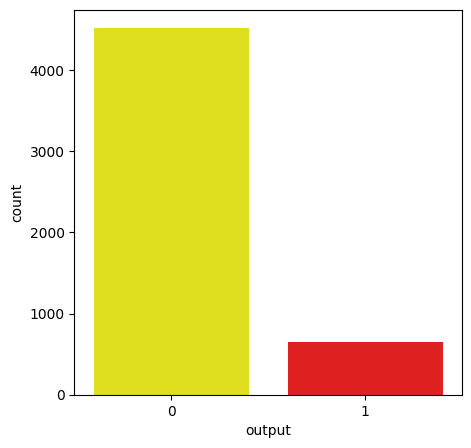

In [14]:
# bar plot of label distribution
plt.figure(figsize=(5, 5))
palette = {'0': "yellow", '1': "red"}
sns.countplot(x='output', data=sms, palette=palette)
plt.show()

**PIE CHART**

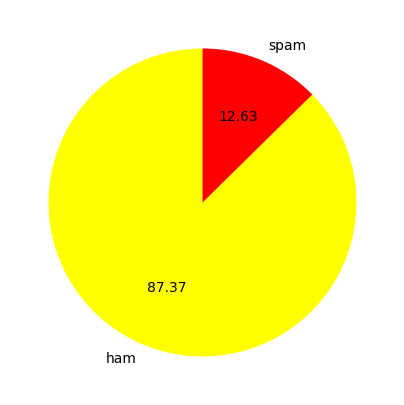

In [15]:
plt.figure(figsize=(5, 5))
plt.pie(sms['output'].value_counts(), labels=['ham', 'spam'], autopct="%1.2f", startangle=90, colors=['yellow', 'red'])
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sms['msg'], sms['output'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [33]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(X_train_vect, y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test_vect)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9680851063829787
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [35]:
# Vectorize the text data using binary features
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer
vectorizer = CountVectorizer(binary=True)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

from sklearn.naive_bayes import BernoulliNB

# Create and train the model
model = BernoulliNB()
model.fit(X_train_vect, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test_vect)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9738878143133463
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.99      0.82      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

